In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics as skm

In [2]:
# Load the data
train= pd.read_csv("train.csv",index_col = 0)
validation=pd.read_csv("validation.csv",index_col = 0)

In [3]:
# Check the shape of train and validation set
print("Train shape:", train.shape)
print("Validation shape:", validation.shape)

Train shape: (243760, 57)
Validation shape: (60941, 57)


## Impute Missing Values

### Input columns: OWN_CAR_AGE, OCCUPATION_TYPE
Columns: ONW_CAR_AGE

In [4]:
# Calculate the mean value of car age when 'FLAG_OWN_CAR' = Y for train and validation
mean_train = train['OWN_CAR_AGE'].mean()
mean_validation = validation['OWN_CAR_AGE'].mean()
print("Car age for train:", mean_train)
print("Car age for validation:", mean_validation)

Car age for train: 12.099066321305946
Car age for validation: 11.959967082970278


In [5]:
validation['OWN_CAR_AGE'] = validation['OWN_CAR_AGE'].fillna(validation['FLAG_OWN_CAR'])
validation['OWN_CAR_AGE'].replace({'N':-1, 'Y':12}, inplace = True)

In [6]:
train['OWN_CAR_AGE'] = train['OWN_CAR_AGE'].fillna(train['FLAG_OWN_CAR'])
train['OWN_CAR_AGE'].replace({'N':-1, 'Y':12}, inplace = True)

In [7]:
# Check the missing value rate of column OWN_CAR_AGE
print("Missing values rate for train:", train['OWN_CAR_AGE'].isna().sum()/len(train))
print("Missing values rate for validation:", validation['OWN_CAR_AGE'].isna().sum()/len(validation))

Missing values rate for train: 0.0
Missing values rate for validation: 0.0


##### Column OCCUPATION_TYPE

In [8]:
# If NAME_INCOME_TYPE == Pensioner, fill na in OCCUPATION_TYPE with Retired for train and validation
train.loc[train['NAME_INCOME_TYPE'] == 'Pensioner', 'OCCUPATION_TYPE'] = 'Retired'
validation.loc[validation['NAME_INCOME_TYPE'] == 'Pensioner', 'OCCUPATION_TYPE'] = 'Retired'

In [9]:
# Check the missing values rate in OCCUPATION_TYPE
print("Missing values rate for train:", train['OCCUPATION_TYPE'].isna().sum()/len(train))
print("Missing values rate for validation:", validation['OCCUPATION_TYPE'].isna().sum()/len(validation))

Missing values rate for train: 0.13313915326550704
Missing values rate for validation: 0.13391641095485798


In [10]:
# Most common occupation type in train and validation
print("Most common occupation type for train:", train['OCCUPATION_TYPE'].value_counts().index[0])
print("Most common occupation type for validation:", validation['OCCUPATION_TYPE'].value_counts().index[0])

Most common occupation type for train: Retired
Most common occupation type for validation: Retired


In [11]:
# Fill the na in train and validation
train['OCCUPATION_TYPE'].fillna('Retired', inplace = True)
validation['OCCUPATION_TYPE'].fillna('Retired', inplace = True)

# Checking missing values
print("Missing values for train:", train['OCCUPATION_TYPE'].isna().sum())
print("Missing values for validation:", validation['OCCUPATION_TYPE'].isna().sum())

Missing values for train: 0
Missing values for validation: 0


#### Inpute other columns

In [12]:
missing_train = pd.DataFrame(train.isnull().sum(), columns =['missing value rate'])
print(missing_train.sort_values(ascending = False, by = 'missing value rate')[0:12])

missing_validation = pd.DataFrame(validation.isnull().sum(), columns =['missing value rate'])
print(missing_validation.sort_values(ascending = False, by = 'missing value rate')[0:10])

                          missing value rate
NAME_TYPE_SUITE                           57
EXT_SOURCE_2                              42
OBS_30_CNT_SOCIAL_CIRCLE                  33
DEF_30_CNT_SOCIAL_CIRCLE                  33
TARGET                                     0
FLAG_DOCUMENT_8                            0
LIVE_CITY_NOT_WORK_CITY                    0
ORGANIZATION_TYPE                          0
DAYS_LAST_PHONE_CHANGE                     0
FLAG_DOCUMENT_2                            0
FLAG_DOCUMENT_3                            0
FLAG_DOCUMENT_4                            0
                          missing value rate
NAME_TYPE_SUITE                           13
EXT_SOURCE_2                              10
OBS_30_CNT_SOCIAL_CIRCLE                   3
DEF_30_CNT_SOCIAL_CIRCLE                   3
TARGET                                     0
FLAG_DOCUMENT_8                            0
LIVE_CITY_NOT_WORK_CITY                    0
ORGANIZATION_TYPE                          0
DAYS_LAST_

In [13]:
# Define functions to fill missing values in categorical variables and numerical variables
def fill_missing(x, categorical = False):
    if categorical == True:
        val_train = train[x].value_counts().index[0]
        val_validation = validation[x].value_counts().index[0]
    
        print("For column {}:".format(x))
        print("Most common values for train:", val_train)
        print("Most common values for test:", val_validation)
    
        # Fill the na in train and validation
        train[x].fillna(val_train, inplace = True)
        validation[x].fillna(val_validation, inplace = True)
    
        # Checking missing values
        print("Missing values left in train:", train[x].isna().sum())
        print("Missing values left in validation:", validation[x].isna().sum())
    else:
        median_train = train[x].median()
        median_validation = validation[x].median()

        print("For column {}:".format(x))
        print("Median value for train:", median_train)
        print("Median value for validation:", median_validation)

        # Fill missing value for train and validation
        train[x].fillna(median_train, inplace = True)
        validation[x].fillna(median_validation, inplace = True)
    
        # Checking missing values
        print("Missing values left in train:", train[x].isna().sum())
        print("Missing values left in validation:", validation[x].isna().sum())

##### Column: NAME_TYPE_SUITE

```
# This is formatted as code
```



In [14]:
# Fill column NAME_TYPE_SUITE
fill_missing('NAME_TYPE_SUITE', categorical = True)

For column NAME_TYPE_SUITE:
Most common values for train: Unaccompanied
Most common values for test: Unaccompanied
Missing values left in train: 0
Missing values left in validation: 0


##### Column: EXT_SOURCE_2 

In [15]:
# Fill column EXT_SOURCE_2
fill_missing('EXT_SOURCE_2')

For column EXT_SOURCE_2:
Median value for train: 0.5657357988357584
Median value for validation: 0.5660312575232652
Missing values left in train: 0
Missing values left in validation: 0


##### Column: OBS_30_CNT_SOCIAL_CIRCLE

In [16]:
# Fill column OBS_30_CNT_SOCIAL_CIRCLE
fill_missing('OBS_30_CNT_SOCIAL_CIRCLE')

For column OBS_30_CNT_SOCIAL_CIRCLE:
Median value for train: 0.0
Median value for validation: 0.0
Missing values left in train: 0
Missing values left in validation: 0


##### Column: DEF_30_CNT_SOCIAL_CIRCLE

In [17]:
# Fill column DEF_30_CNT_SOCIAL_CIRCLE
fill_missing('DEF_30_CNT_SOCIAL_CIRCLE')

For column DEF_30_CNT_SOCIAL_CIRCLE:
Median value for train: 0.0
Median value for validation: 0.0
Missing values left in train: 0
Missing values left in validation: 0


In [18]:
print("Check missing values in train:", train.isna().values.any())
print("Check missing values in validation:", validation.isna().values.any())

Check missing values in train: False
Check missing values in validation: False


### Deal with Categorical Variable

In [19]:
# Columns that are categorical variables
cat_train_idx = train.dtypes[train.dtypes == 'object'].index
cat_train_idx

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

##### Categorical variable: OCCUPATION_TYPE

In [20]:
train['OCCUPATION_TYPE'].value_counts()

Retired                  76312
Laborers                 43794
Sales staff              25489
Core staff               21914
Managers                 16895
Drivers                  14865
High skill tech staff     9016
Accountants               7705
Medicine staff            6757
Security staff            5343
Cooking staff             4692
Cleaning staff            3693
Private service staff     2076
Low-skill Laborers        1676
Waiters/barmen staff      1068
Secretaries               1007
Realty agents              584
HR staff                   447
IT staff                   427
Name: OCCUPATION_TYPE, dtype: int64

In [21]:
# Deal with the levels in data
train.replace({'OCCUPATION_TYPE':{'Sales staff': 'White collar',
                                  'Core staff': 'White collar',
                                  'Managers': 'White collar',
                                  'Drivers': 'Blue collar',
                                  'High skill tech staff': 'White collar',
                                  'Accountants': 'White collar',
                                  'Medicine staff': 'White collar',
                                  'Security staff': 'Blue collar',
                                  'Cooking staff': 'Blue collar',
                                  'Cleaning staff': 'Blue collar',
                                  'Private service staff': 'Blue collar',
                                  'Low-skill Laborers': 'Blue collar',
                                  'Waiters/barmen staff': 'Blue collar',
                                  'Secretaries': 'White collar',
                                  'Realty agents': 'White collar',
                                  'HR staff': 'White collar',
                                  'IT staff': 'White collar'}}, inplace = True)

In [22]:
train['OCCUPATION_TYPE'].value_counts()

White collar    90241
Retired         76312
Laborers        43794
Blue collar     33413
Name: OCCUPATION_TYPE, dtype: int64

In [23]:
# Deal with the values in validation
validation.replace({'OCCUPATION_TYPE':{'Sales staff': 'White collar',
                                  'Core staff': 'White collar',
                                  'Managers': 'White collar',
                                  'Drivers': 'Blue collar',
                                  'High skill tech staff': 'White collar',
                                  'Accountants': 'White collar',
                                  'Medicine staff': 'White collar',
                                  'Security staff': 'Blue collar',
                                  'Cooking staff': 'Blue collar',
                                  'Cleaning staff': 'Blue collar',
                                  'Private service staff': 'Blue collar',
                                  'Low-skill Laborers': 'Blue collar',
                                  'Waiters/barmen staff': 'Blue collar',
                                  'Secretaries': 'White collar',
                                  'Realty agents': 'White collar',
                                  'HR staff': 'White collar',
                                  'IT staff': 'White collar'}}, inplace = True)

In [24]:
validation['OCCUPATION_TYPE'].value_counts()

White collar    22517
Retired         19167
Laborers        10970
Blue collar      8287
Name: OCCUPATION_TYPE, dtype: int64

##### Categorical Variable: NAME_INCOME_TYPE

In [25]:
train['NAME_INCOME_TYPE'].value_counts()

Working                 126047
Commercial associate     56592
Pensioner                43858
State servant            17221
Unemployed                  15
Student                     14
Businessman                  8
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Group unemployed, student, businessman and maternity leave in a small group - other.
<br> The reason to group these four levels is that only a few records are in those levels. It always happens that only train set contains some levels. For instance, Maternity leave only has 5 records. When doing train test split, only train set contains this 5 records. After doing one hot encoding, this results in the train and validation set in different shape.  

In [26]:
# Deal with train
train.replace({'NAME_INCOME_TYPE':{'Unemployed': 'Other',
                                   'Student': 'Other',
                                   'Businessman': 'Other',
                                   'Maternity leave': 'Other'}}, inplace = True)

In [27]:
train['NAME_INCOME_TYPE'].value_counts()

Working                 126047
Commercial associate     56592
Pensioner                43858
State servant            17221
Other                       42
Name: NAME_INCOME_TYPE, dtype: int64

In [28]:
# Deal with validation
validation.replace({'NAME_INCOME_TYPE':{'Unemployed': 'Other',
                                        'Student': 'Other',
                                        'Businessman': 'Other',
                                        'Maternity leave': 'Other'}}, inplace = True)

In [29]:
validation['NAME_INCOME_TYPE'].value_counts()

Working                 31387
Commercial associate    14243
Pensioner               11006
State servant            4296
Other                       9
Name: NAME_INCOME_TYPE, dtype: int64

##### Categorical variable: ORGANIZATION_TYPE

In [30]:
train['ORGANIZATION_TYPE'].value_counts()[0:20]

Business Entity Type 3    53886
XNA                       43865
Self-employed             30488
Other                     13161
Medicine                   8825
Business Entity Type 2     8364
Government                 8333
School                     7037
Trade: type 7              6169
Kindergarten               5529
Construction               5286
Business Entity Type 1     4731
Transport: type 4          4316
Trade: type 3              2757
Industry: type 9           2674
Industry: type 3           2638
Security                   2596
Housing                    2318
Industry: type 11          2155
Military                   2090
Name: ORGANIZATION_TYPE, dtype: int64

In [31]:
# Drop columns ORGANIZATION_TYPE
train = train.drop('ORGANIZATION_TYPE', axis = 1)
validation = validation.drop('ORGANIZATION_TYPE', axis = 1)

#### One-Hot Encoding

In [32]:
# Conduct one-hot encoding, drop_first should be True to get the dummy variables
train = pd.get_dummies(train, drop_first = True)
validation = pd.get_dummies(validation, drop_first = True)

In [33]:
print("Train shape:", train.shape)
print("validation shape:", validation.shape)

Train shape: (243760, 82)
validation shape: (60941, 81)


In [34]:
# We have one column missing for validation. Match columns in train and validation
def list_diff(list1, list2): 
    list_difference = []
    for item in list1: 
        if item not in list2:
            list_difference.append(item)
    return list_difference
list_diff(list(train.columns),list(validation.columns))

['CODE_GENDER_XNA']

After further exploration, we find that 'CODE_GENDER_XNA' only has four records, we can drop this column as well.

In [35]:
train['CODE_GENDER_XNA'].sort_values(ascending = False)[0:5]

SK_ID_CURR
319880    1
144669    1
196708    1
141289    1
166591    0
Name: CODE_GENDER_XNA, dtype: uint8

In [36]:
# Drop the four rows
train.drop([319880, 144669, 196708, 141289], inplace = True)

In [37]:
# Then drop the column CODE_GENDER_XNA' in train
train.drop('CODE_GENDER_XNA', axis = 1, inplace = True)

In [38]:
print(train.shape)
print(validation.shape)

(243756, 81)
(60941, 81)


### Normalize the data

In [39]:
# Prepare X_train, X_validation, y_train, y_validation
X_train_rw = train.drop('TARGET', axis = 1)
X_validation_rw = validation.drop('TARGET', axis = 1)

y_train = train['TARGET']
y_validation = validation['TARGET']

print("X_train shape:", X_train_rw.shape, "y_train shape:", y_train.shape)
print("X_validation shape:", X_validation_rw.shape, "y_validation shape:", y_validation.shape)

X_train shape: (243756, 80) y_train shape: (243756,)
X_validation shape: (60941, 80) y_validation shape: (60941,)


In [40]:
# Standardize the train and validation data
scaler = StandardScaler()
scaler.fit(X_train_rw, y_train)

StandardScaler()

In [41]:
X_train = scaler.transform(X_train_rw)
X_validation = scaler.transform(X_validation_rw)

In [42]:
X_test=X_validation 
y_test=y_validation

## Undersampling Majority Class using Randomundersampling (USM)

In [43]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn import metrics as skm

In [44]:
# extreme undersampling major class 
under = RandomUnderSampler(sampling_strategy=1)
X_train_usm, y_train_usm = under.fit_sample(X_train.astype('float'), y_train)
print("Before usm: ", Counter(y_train))
print("After usm: ", Counter(y_train_usm))

Before usm:  Counter({0: 223896, 1: 19860})
After usm:  Counter({0: 19860, 1: 19860})


## Original Data - LinearSVM + RandomizedSearchCV

In [46]:
#Fit model on the training data
linearsvm_rd = LinearSVC(random_state=42)
param1 = {"C": np.arange(0.01, 10, 0.2)}
linearsvm_rd = RandomizedSearchCV(linearsvm_rd, param1, cv = 5, verbose = 0, n_jobs = -1)
linearsvm_rd.fit(X_train, y_train)

/Users/amilyhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomizedSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81])})

In [47]:
print(linearsvm_rd.best_estimator_)

LinearSVC(C=0.6100000000000001, random_state=42)


In [48]:
linearsvm_rd_pred = linearsvm_rd.best_estimator_.predict(X_test)

In [49]:
decision_scores = linearsvm_rd.decision_function(X_test)
fpr, tpr, thres = roc_curve(y_test, decision_scores)
print('AUC: {:.3f}'.format(roc_auc_score(y_test, decision_scores)))

AUC: 0.704


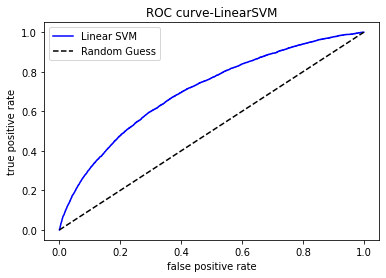

In [50]:
plt.plot(fpr, tpr, "b", label='Linear SVM')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve-LinearSVM")
plt.show()

In [51]:
print("Accuracy Test:", skm.accuracy_score(y_test, linearsvm_rd_pred))
print("Precision Test:", skm.precision_score(y_test, linearsvm_rd_pred))
print("Recall Test:", skm.recall_score(y_test, linearsvm_rd_pred))

Accuracy Test: 0.9182652073316815
Precision Test: 0.05555555555555555
Recall Test: 0.0002014098690835851


In [52]:
auc_OD = roc_auc_score(y_test, decision_scores)
accuracy_OD = skm.accuracy_score(y_test, linearsvm_rd_pred)
recall_OD = skm.recall_score(y_test, linearsvm_rd_pred)

In [54]:
linearsvm_rd_pred_train = linearsvm_rd.best_estimator_.predict(X_train)
decision_scores_train = linearsvm_rd.decision_function(X_train)
auc_OD_train = roc_auc_score(y_train, decision_scores_train)
accuracy_OD_train = skm.accuracy_score(y_train, linearsvm_rd_pred_train)
recall_OD_train = skm.recall_score(y_train, linearsvm_rd_pred_train)

In [58]:
print("Accuracy Test:", skm.accuracy_score(y_train, linearsvm_rd_pred_train))
print("Precision Test:", skm.precision_score(y_train, linearsvm_rd_pred_train))
print("Recall Test:", skm.recall_score(y_train, linearsvm_rd_pred_train))

Accuracy Test: 0.9183199593035659
Precision Test: 0.17105263157894737
Recall Test: 0.0006545820745216516


## Original Data- LinearSVC + RandomizedSearchCV + Weighted Cost Function

In [59]:
weights =  [{0:1,1:4}, {0:1, 1:6}, {0:1,1:8}, {0:1, 1:10}, {0:1, 1:12}]

In [60]:
#Fit model on the training data
linearsvm_weight = LinearSVC(random_state=42)
param_weight = {"C": np.arange(0.01, 10, 0.2), "class_weight": weights}
linearsvm_weight = RandomizedSearchCV(linearsvm_weight, param_weight, cv = 5, verbose = 0, n_jobs = -1)
linearsvm_weight.fit(X_train, y_train)

/Users/amilyhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomizedSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81]),
                                        'class_weight': [{0: 1, 1: 4},
                                                         {0: 1, 1: 6},
                                                         {0: 1, 1: 8},
                                                         {0: 1, 1: 10},
                                                         {0: 1, 1: 12}]})

In [61]:
print(linearsvm_weight.best_estimator_)

LinearSVC(C=3.21, class_weight={0: 1, 1: 4}, random_state=42)


In [62]:
linearsvm_weight_pred = linearsvm_weight.best_estimator_.predict(X_test)

In [63]:
decision_scores_w = linearsvm_weight.decision_function(X_test)
fpr_w, tpr_w, thres_w = roc_curve(y_test, decision_scores_w)
print('AUC: {:.3f}'.format(roc_auc_score(y_test, decision_scores_w)))

AUC: 0.635


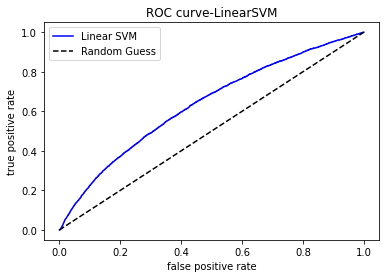

In [64]:
plt.plot(fpr_w, tpr_w, "b", label='Linear SVM')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve-LinearSVM")
plt.show()

In [65]:
print("Accuracy Test:", skm.accuracy_score(y_test, linearsvm_weight_pred))
print("Precision Test:", skm.precision_score(y_test, linearsvm_weight_pred))
print("Recall Test:", skm.recall_score(y_test, linearsvm_weight_pred))

Accuracy Test: 0.9100441410544625
Precision Test: 0.17153748411689962
Recall Test: 0.027190332326283987


In [66]:
auc_OD_w = roc_auc_score(y_test, decision_scores_w)
accuracy_OD_w = skm.accuracy_score(y_test, linearsvm_weight_pred)
recall_OD_w = skm.recall_score(y_test, linearsvm_weight_pred)

In [67]:
linearsvm_w_pred_train = linearsvm_weight.best_estimator_.predict(X_train)
decision_scores_w_train = linearsvm_weight.decision_function(X_train)
auc_OD_w_train = roc_auc_score(y_train, decision_scores_w_train)
accuracy_OD_w_train = skm.accuracy_score(y_train, linearsvm_w_pred_train)
recall_OD_w_train = skm.recall_score(y_train, linearsvm_w_pred_train)

In [68]:
print("Accuracy Test:", skm.accuracy_score(y_train, linearsvm_w_pred_train))
print("Precision Test:", skm.precision_score(y_train, linearsvm_w_pred_train))
print("Recall Test:", skm.recall_score(y_train, linearsvm_w_pred_train))

Accuracy Test: 0.9102750291274881
Precision Test: 0.18956468045693114
Recall Test: 0.03091641490433031


## USM- LinearSVC + RandomizedSearchCV

In [69]:
# run with extreme undersampling
linearsvm_usm = LinearSVC(random_state=42)

param_usm = {"C": np.arange(0.01, 10, 0.2)}
linearsvm_usm_rd = RandomizedSearchCV(linearsvm_usm, param1, cv = 5, verbose = 0, n_jobs = -1)
linearsvm_usm_rd.fit(X_train_usm, y_train_usm)

/Users/amilyhuang/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomizedSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
                   param_distributions={'C': array([0.01, 0.21, 0.41, 0.61, 0.81, 1.01, 1.21, 1.41, 1.61, 1.81, 2.01,
       2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21,
       4.41, 4.61, 4.81, 5.01, 5.21, 5.41, 5.61, 5.81, 6.01, 6.21, 6.41,
       6.61, 6.81, 7.01, 7.21, 7.41, 7.61, 7.81, 8.01, 8.21, 8.41, 8.61,
       8.81, 9.01, 9.21, 9.41, 9.61, 9.81])})

In [70]:
print(linearsvm_usm_rd.best_params_)

{'C': 0.01}


In [71]:
linearsvm_usm_rd_pred = linearsvm_usm_rd.best_estimator_.predict(X_test)

In [72]:
decision_scores_usm = linearsvm_usm_rd.decision_function(X_test)
fpr_usm, tpr_usm, thres_usm = roc_curve(y_test, decision_scores_usm)
print('AUC: {:.3f}'.format(roc_auc_score(y_test, decision_scores_usm)))

AUC: 0.704


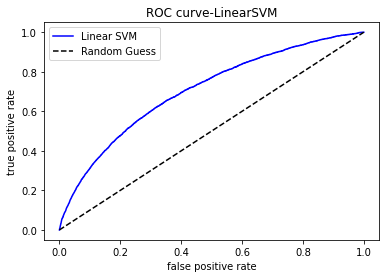

In [73]:
plt.plot(fpr_usm, tpr_usm, "b", label='Linear SVM')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve-LinearSVM")
plt.show()

In [74]:
print("Accuracy Test:", skm.accuracy_score(y_test, linearsvm_usm_rd_pred))
print("Precision Test:", skm.precision_score(y_test, linearsvm_usm_rd_pred))
print("Recall Test:", skm.recall_score(y_test, linearsvm_usm_rd_pred))

Accuracy Test: 0.6637403390164257
Precision Test: 0.14421887172906833
Recall Test: 0.6338368580060423


In [77]:
auc_usm = roc_auc_score(y_test, decision_scores_usm)
accuracy_usm = skm.accuracy_score(y_test, linearsvm_usm_rd_pred)
recall_usm = skm.recall_score(y_test, linearsvm_usm_rd_pred)

In [78]:
linearsvm_usm_pred_train = linearsvm_usm_rd.best_estimator_.predict(X_train)
decision_scores_usm_train = linearsvm_usm_rd.decision_function(X_train)
auc_usm_train = roc_auc_score(y_train, decision_scores_usm_train)
accuracy_usm_train = skm.accuracy_score(y_train, linearsvm_usm_pred_train)
recall_usm_train = skm.recall_score(y_train, linearsvm_usm_pred_train)

In [80]:
print("Accuracy Test:", skm.accuracy_score(y_train, linearsvm_usm_pred_train))
print("Precision Test:", skm.precision_score(y_train, linearsvm_usm_pred_train))
print("Recall Test:", skm.recall_score(y_train, linearsvm_usm_pred_train))

Accuracy Test: 0.6592247985690609
Precision Test: 0.14179493573323057
Recall Test: 0.6299093655589124


## Create Table

In [83]:
data_train = {"Accuracy": [accuracy_OD_train, accuracy_OD_w_train, accuracy_usm_train], "Recall": [recall_OD_train, recall_OD_w_train, recall_usm_train], "AUC": [auc_OD_train, auc_OD_w_train, auc_usm_train]}


In [84]:
df_train = pd.DataFrame(data_train, columns = ["Accuracy", "Recall","AUC"], index = ["Original Data + RandomizedSearchCV", "Original Data + Weighted Cost Function", "Undersampling + RandomizedSearchCV"])
df_train

,Accuracy,Recall,AUC
Original Data + RandomizedSearchCV,0.918320,0.000655,0.698785
Original Data + Weighted Cost Function,0.910275,0.030916,0.629627
Undersampling + RandomizedSearchCV,0.659225,0.629909,0.699494


In [88]:
data_test = {"Accuracy": [accuracy_OD, accuracy_OD_w, accuracy_usm], "Recall": [recall_OD, recall_OD_w, recall_usm], "AUC": [auc_OD, auc_OD_w, auc_usm]}


In [89]:
df_test = pd.DataFrame(data_test, columns = ["Accuracy", "Recall","AUC"], index = ["Original Data + RandomizedSearchCV", "Original Data + Weighted Cost Function", "Undersampling + RandomizedSearchCV"])
df_test

,Accuracy,Recall,AUC
Original Data + RandomizedSearchCV,0.918265,0.000201,0.703843
Original Data + Weighted Cost Function,0.910044,0.027190,0.635207
Undersampling + RandomizedSearchCV,0.663740,0.633837,0.704300


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')

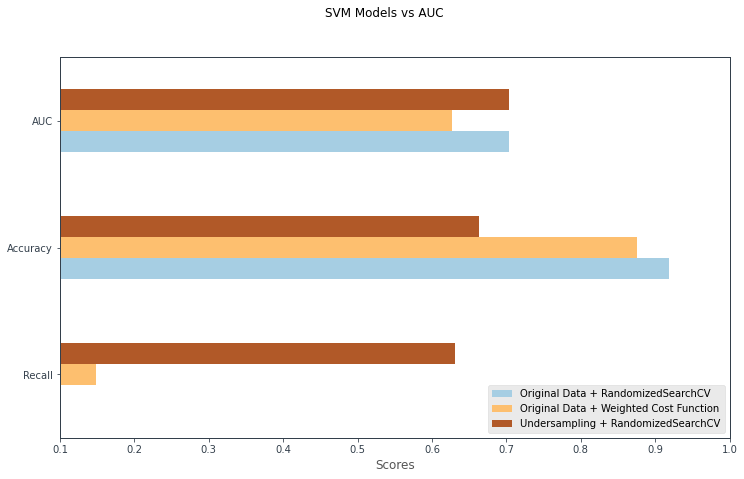

In [219]:
fig, ax = plt.subplots(figsize=(12,7))
fig.suptitle('SVM Models vs AUC')


plot = df.plot(kind='barh', legend = False, ax=ax, colormap='Paired')
ax.set_xlabel('Scores')
plt.xlim(0.1, 1)
plt.legend(loc= 0, fontsize='medium')
ax.set_facecolor('white')

plt.show()